In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import pandas as pd
pandas_df = pd.read_csv('dataset2.csv')

In [3]:
spark = SparkSession.builder \
        .appName('Sanuis Health Assesment') \
        .getOrCreate()

23/09/25 21:52:57 WARN Utils: Your hostname, ashutoshexflow-Inspiron-5409 resolves to a loopback address: 127.0.1.1; using 192.168.101.101 instead (on interface wlp43s0)
23/09/25 21:52:57 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/09/25 21:52:58 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [10]:
pandas_df.head()

,activityID,heart_rate,hand temperature (°C),hand acceleration X ±16g,hand acceleration Y ±16g,hand acceleration Z ±16g,hand gyroscope X,hand gyroscope Y,hand gyroscope Z,hand magnetometer X,...,ankle acceleration X ±16g,ankle acceleration Y ±16g,ankle acceleration Z ±16g,ankle gyroscope X,ankle gyroscope Y,ankle gyroscope Z,ankle magnetometer X,ankle magnetometer Y,ankle magnetometer Z,PeopleId
0,transient activities,104.0,30.0,2.37223,8.60074,3.51048,-0.092217,0.056812,-0.015845,14.6806,...,9.65918,-1.65569,-0.099797,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1
1,transient activities,104.0,30.0,2.18837,8.56560,3.66179,-0.024413,0.047759,0.006474,14.8991,...,9.69370,-1.57902,-0.215687,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1
2,transient activities,104.0,30.0,2.37357,8.60107,3.54898,-0.057976,0.032574,-0.006988,14.2420,...,9.58944,-1.73276,0.092914,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1
3,transient activities,104.0,30.0,2.07473,8.52853,3.66021,-0.002352,0.032810,-0.003747,14.8908,...,9.58814,-1.77040,0.054545,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1
4,transient activities,104.0,30.0,2.22936,8.83122,3.70000,0.012269,0.018305,-0.053325,15.5612,...,9.69771,-1.65625,-0.060809,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1


In [4]:
df = spark.read.csv('dataset2.csv',header=True)

In [4]:
df.select('activityId').distinct().show()
df.count()

+--------------------+
|          activityId|
+--------------------+
|             sitting|
|            standing|
|             cycling|
|     vacuum cleaning|
|        rope jumping|
|             ironing|
|transient activities|
|    ascending stairs|
|             walking|
|             running|
|      Nordic walking|
|               lying|
|   descending stairs|
+--------------------+



2864056

#  KPI 1
# average heart rate

In [5]:

# check for na values
print(df.filter(F.col('heart_rate').isNull()).count())
print(df.filter(F.col('activityId').isNull()).count())
df = df.na.drop()

46


0


In [6]:
overall_avg = df.select('heart_rate').agg(F.avg('heart_rate').alias('AVG_HEART_RATE')) 

In [7]:
overall_avg.show()

23/09/25 00:21:01 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+------------------+
|    AVG_HEART_RATE|
+------------------+
|109.77026197534227|
+------------------+



In [8]:
activity_wise_avg = df.groupBy('activityId').agg(F.avg('heart_rate').alias('Per_Activity_Heart_Rate'))
activity_wise_avg.show()

+--------------------+-----------------------+
|          activityId|Per_Activity_Heart_Rate|
+--------------------+-----------------------+
|             sitting|      80.01306510141046|
|            standing|      88.55474093223329|
|             cycling|     124.88430133657351|
|     vacuum cleaning|      104.1954571635501|
|        rope jumping|     163.98919093892212|
|             ironing|       90.0623151367883|
|transient activities|     114.81774470369415|
|    ascending stairs|     129.52980627838582|
|             walking|     112.78570163925814|
|             running|     156.59334209105998|
|      Nordic walking|     123.83081123557821|
|               lying|      75.53610912131867|
|   descending stairs|     129.15687890684558|
+--------------------+-----------------------+



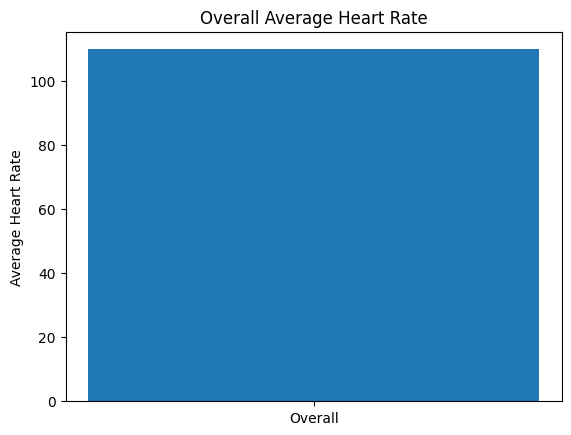

In [23]:
import matplotlib.pyplot as plt

# For overall average
overall_avg = df.select('heart_rate').agg(F.avg('heart_rate').alias('AVG_HEART_RATE')).collect()
avg_heart_rate = overall_avg[0]['AVG_HEART_RATE']

plt.bar('Overall', avg_heart_rate)
plt.title('Overall Average Heart Rate')
plt.ylabel('Average Heart Rate')
plt.show()

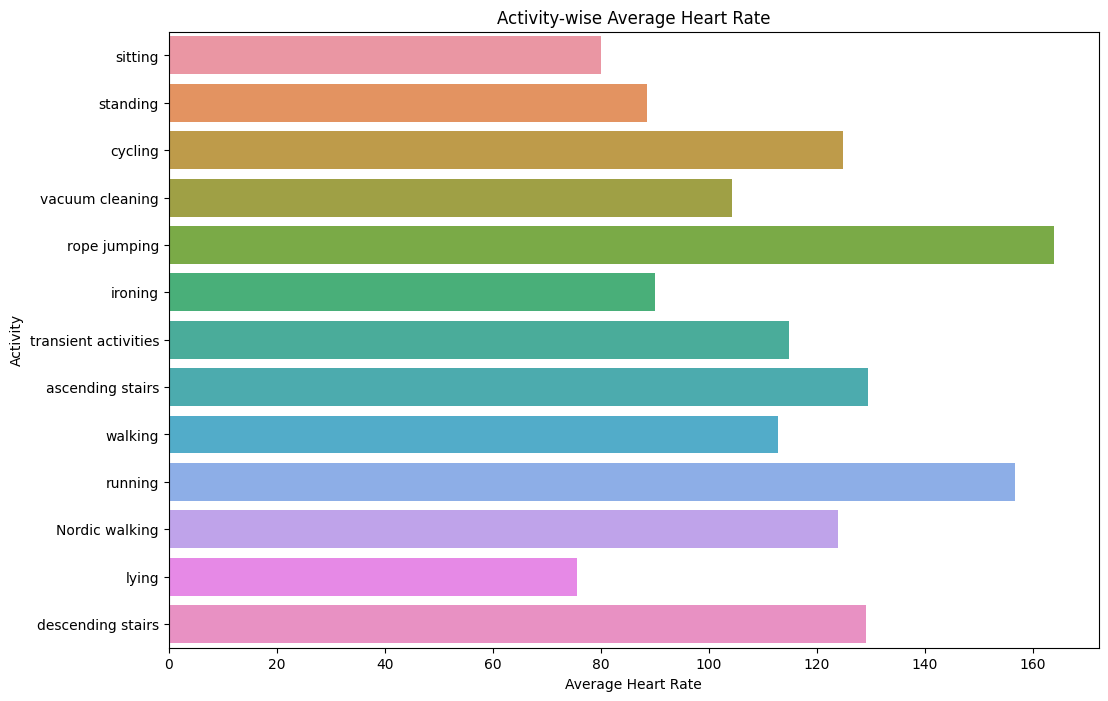

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# Convert Spark DataFrame to Pandas DataFrame
activity_wise_avg_pd = activity_wise_avg.toPandas()

plt.figure(figsize=(12, 8))
sns.barplot(x='Per_Activity_Heart_Rate', y='activityId', data=activity_wise_avg_pd)
plt.title('Activity-wise Average Heart Rate')
plt.xlabel('Average Heart Rate')
plt.ylabel('Activity')
plt.show()


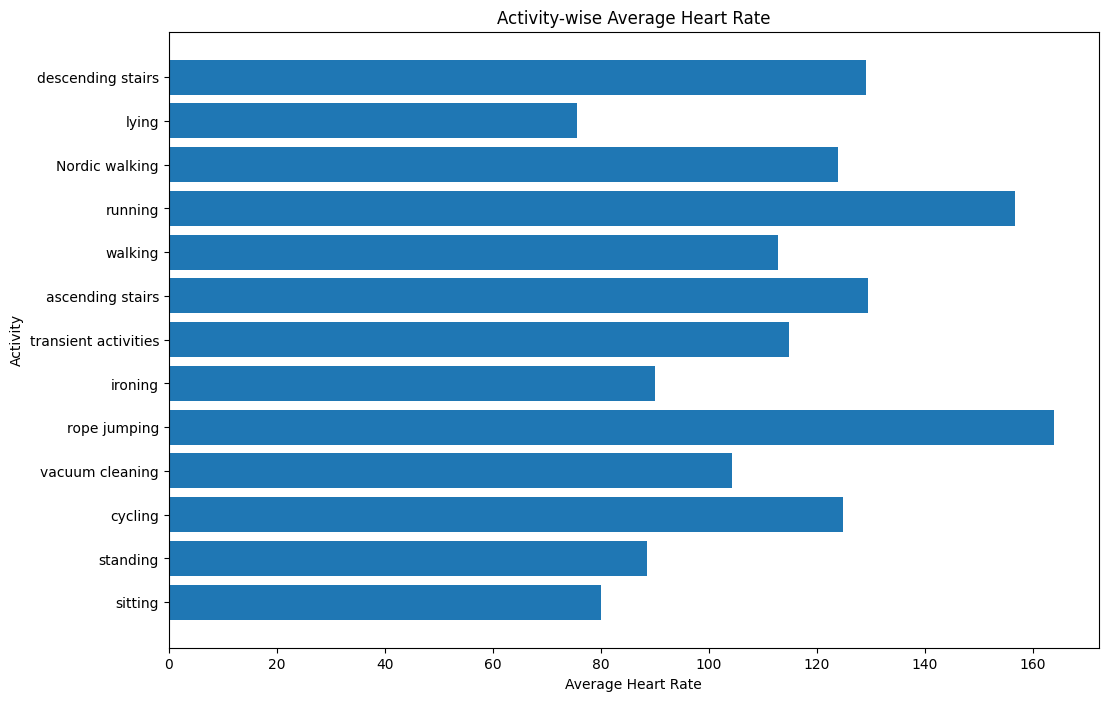

In [24]:
import matplotlib.pyplot as plt

# Collect only the aggregated data
activity_wise_avg_list = activity_wise_avg.collect()

# Separate the data into two lists for plotting
activities = [row['activityId'] for row in activity_wise_avg_list]
avg_heart_rates = [row['Per_Activity_Heart_Rate'] for row in activity_wise_avg_list]

plt.figure(figsize=(12, 8))
plt.barh(activities, avg_heart_rates)
plt.title('Activity-wise Average Heart Rate')
plt.xlabel('Average Heart Rate')
plt.ylabel('Activity')
plt.show()


In [10]:
df.select('activityID','hand temperature (°C)', 'chest temperature (°C)', 'ankle temperature (°C)').show()

+--------------------+---------------------+----------------------+----------------------+
|          activityID|hand temperature (°C)|chest temperature (°C)|ankle temperature (°C)|
+--------------------+---------------------+----------------------+----------------------+
|transient activities|                 30.0|               31.8125|               30.3125|
|transient activities|                 30.0|               31.8125|               30.3125|
|transient activities|                 30.0|               31.8125|               30.3125|
|transient activities|                 30.0|               31.8125|               30.3125|
|transient activities|                 30.0|               31.8125|               30.3125|
|transient activities|                 30.0|               31.8125|               30.3125|
|transient activities|                 30.0|               31.8125|               30.3125|
|transient activities|                 30.0|               31.8125|               30.3125|

In [11]:
# calculate std deviation

# Temperature Variability

In [12]:
df.select(F.stddev('hand temperature (°C)'), F.stddev('chest temperature (°C)'), F.stddev('ankle temperature (°C)')).show()

+----------------------------------+-----------------------------------+-----------------------------------+
|stddev_samp(hand temperature (°C))|stddev_samp(chest temperature (°C))|stddev_samp(ankle temperature (°C))|
+----------------------------------+-----------------------------------+-----------------------------------+
|                1.8007722171847302|                 1.5733352191470058|                  1.179755040193216|
+----------------------------------+-----------------------------------+-----------------------------------+



In [13]:
variablity_in_temp=df.groupBy('activityID').agg(F.stddev('hand temperature (°C)').alias('hand_tempreature'), F.stddev('chest temperature (°C)').alias('chest tempreature'), F.stddev('ankle temperature (°C)').alias('ankle tempreature')).show()

+--------------------+------------------+------------------+------------------+
|          activityID|  hand_tempreature| chest tempreature| ankle tempreature|
+--------------------+------------------+------------------+------------------+
|             sitting| 1.103127131564605|1.2554113449436661|0.9534822157217127|
|            standing|0.8568811693432082|1.0687519627963207|0.8346363127652572|
|             cycling| 1.997441189662431|1.6020976698071203|0.8746350816155509|
|     vacuum cleaning|0.6520642110268958|0.8910295514887121|0.6285913893365512|
|        rope jumping|1.8442606400478427| 1.473080380321608|1.4550705654324523|
|             ironing|0.7739191470965712|0.9273655817625339|0.7338152577431781|
|transient activities|1.8993351836507788| 1.750064089915622|1.3524753920877672|
|    ascending stairs| 0.876445205726438|0.8727527612482019| 0.857977745087055|
|             walking|1.3827576621582438|0.8278214355435967| 0.914261446273505|
|             running| 2.086611039577671

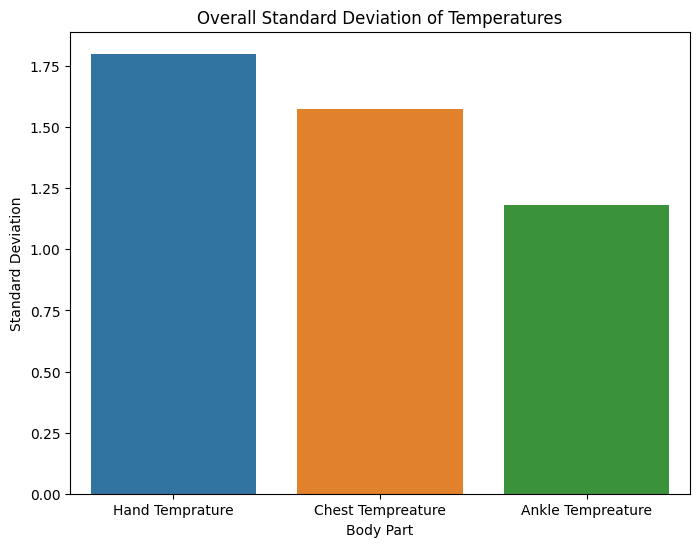

In [14]:
# Convert Spark DataFrame to Pandas DataFrame
overall_stddev_pd = df.select(F.stddev('hand temperature (°C)').alias('Hand Temprature'), F.stddev('chest temperature (°C)').alias('Chest Tempreature'), F.stddev('ankle temperature (°C)').alias('Ankle Tempreature')).toPandas()

plt.figure(figsize=(8, 6))
sns.barplot(data=overall_stddev_pd)
plt.title('Overall Standard Deviation of Temperatures')
plt.xlabel('Body Part')
plt.ylabel('Standard Deviation')
plt.show()


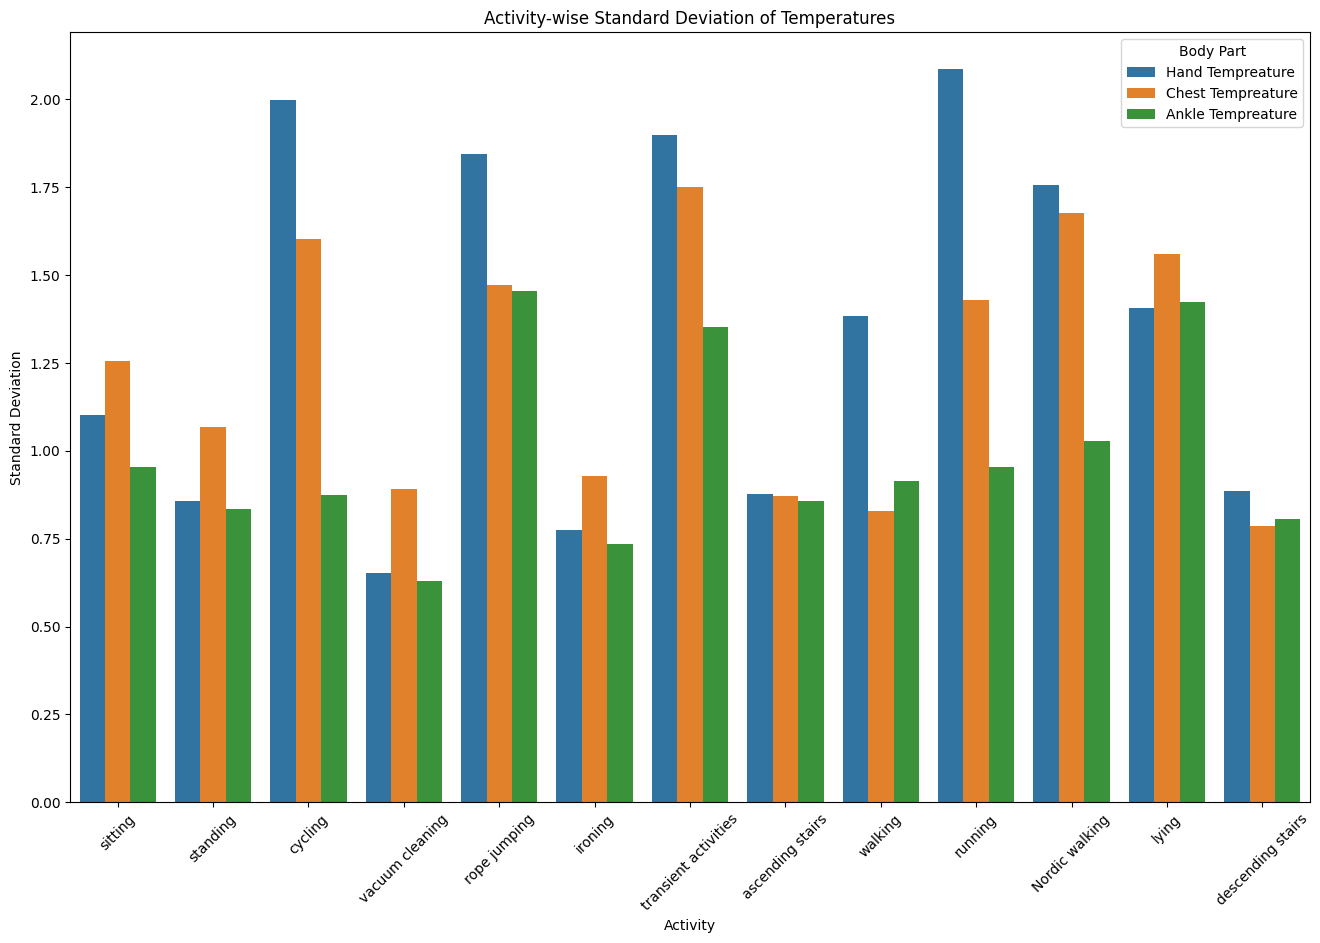

In [15]:
# Convert Spark DataFrame to Pandas DataFrame
activity_wise_stddev_pd = df.groupBy('activityID').agg(F.stddev('hand temperature (°C)').alias('Hand Tempreature'), F.stddev('chest temperature (°C)').alias('Chest Tempreature'), F.stddev('ankle temperature (°C)').alias('Ankle Tempreature')).toPandas()

# Melt the DataFrame for easier plotting
activity_wise_stddev_pd_melted = activity_wise_stddev_pd.melt(id_vars=['activityID'], var_name='Body Part', value_name='Standard Deviation')

plt.figure(figsize=(16, 10))
sns.barplot(x='activityID', y='Standard Deviation', hue='Body Part', data=activity_wise_stddev_pd_melted)
plt.title('Activity-wise Standard Deviation of Temperatures')
plt.xlabel('Activity')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=45)
plt.show()


In [16]:
df.columns

['activityID',
 'heart_rate',
 'hand temperature (°C)',
 'hand acceleration X ±16g',
 'hand acceleration Y ±16g',
 'hand acceleration Z ±16g',
 'hand gyroscope X',
 'hand gyroscope Y',
 'hand gyroscope Z',
 'hand magnetometer X',
 'hand magnetometer Y',
 'hand magnetometer Z',
 'chest temperature (°C)',
 'chest acceleration X ±16g',
 'chest acceleration Y ±16g',
 'chest acceleration Z ±16g',
 'chest gyroscope X',
 'chest gyroscope Y',
 'chest gyroscope Z',
 'chest magnetometer X',
 'chest magnetometer Y',
 'chest magnetometer Z',
 'ankle temperature (°C)',
 'ankle acceleration X ±16g',
 'ankle acceleration Y ±16g',
 'ankle acceleration Z ±16g',
 'ankle gyroscope X',
 'ankle gyroscope Y',
 'ankle gyroscope Z',
 'ankle magnetometer X',
 'ankle magnetometer Y',
 'ankle magnetometer Z',
 'PeopleId']

# Active Intensity KPI 3

In [5]:
df = df.withColumn('hand_intensity',F.sqrt(F.col('hand acceleration X ±16g') ** 2 + F.col('hand acceleration Y ±16g') ** 2+ F.col('hand acceleration X ±16g') ** 2))

In [6]:
df = df.withColumn('chest_intensity',F.sqrt(F.col('chest acceleration X ±16g') ** 2 + F.col('chest acceleration Y ±16g') ** 2+ F.col('chest acceleration X ±16g') ** 2))
df = df.withColumn('ankle_intensity',F.sqrt(F.col('ankle acceleration X ±16g') ** 2 + F.col('ankle acceleration Y ±16g') ** 2+ F.col('ankle acceleration X ±16g') ** 2))

In [7]:
df.select('hand_intensity','chest_intensity','ankle_intensity').show()

+-----------------+-----------------+------------------+
|   hand_intensity|  chest_intensity|   ankle_intensity|
+-----------------+-----------------+------------------+
| 9.23188382148519|9.805812162880747| 13.76011722046364|
|9.107547961652466|9.623435311477913|13.799599397823112|
|9.232880061752128| 9.72991614801474|13.671765659372603|
|9.019137048892205|9.551551006722311|13.674764110550498|
|9.377128489447076| 9.50957307803037|13.814279660941429|
|9.409175853405015|9.774242521774667|13.811112905200654|
|9.427509296139677| 9.69968262635134|13.875575836396845|
|9.656101212849832|9.657164463587227|13.816389299154828|
|9.713359510504077|9.620435117368237| 13.85929025648139|
|9.639278544253196|9.579050424238407|13.868443492879798|
| 9.47874850679139|9.504735549202724|13.917488373413502|
|9.370546895176398|9.700531049296838|13.814279660941429|
|9.377830707637026|9.549752501965273|13.722519532418238|
|9.532826451499052| 9.70018774158717|13.856127067395128|
|9.625326097213538|9.7767850041

# AVG Active Intensity w.r.t Activity

In [8]:
avg = df.groupBy('activityID').agg(F.avg('hand_intensity'),F.avg('chest_intensity'),F.avg('ankle_intensity'))

In [9]:
avg.show()

+--------------------+-------------------+--------------------+--------------------+
|          activityID|avg(hand_intensity)|avg(chest_intensity)|avg(ankle_intensity)|
+--------------------+-------------------+--------------------+--------------------+
|             sitting|  8.078455635824328|   9.461832180687283|  12.856210793535515|
|            standing| 12.013811343323528|    9.71033653182198|  13.469961253136745|
|             cycling|  9.380839028333584|   6.652376006242754|  13.943961712795204|
|     vacuum cleaning| 12.455415033390292|   7.682710680969562|  13.843560360893282|
|        rope jumping| 13.526958020007074|  12.243369923231985|  19.500326265120535|
|             ironing|   8.68437473540333|   9.451331045337731|  13.643560914720654|
|transient activities| 11.422636766634652|   9.551695833084027|   14.51310381627706|
|    ascending stairs| 13.651797028783387|   9.625851946569128|  15.890229424338246|
|             walking| 14.920957792563566|   9.868030272171623|  

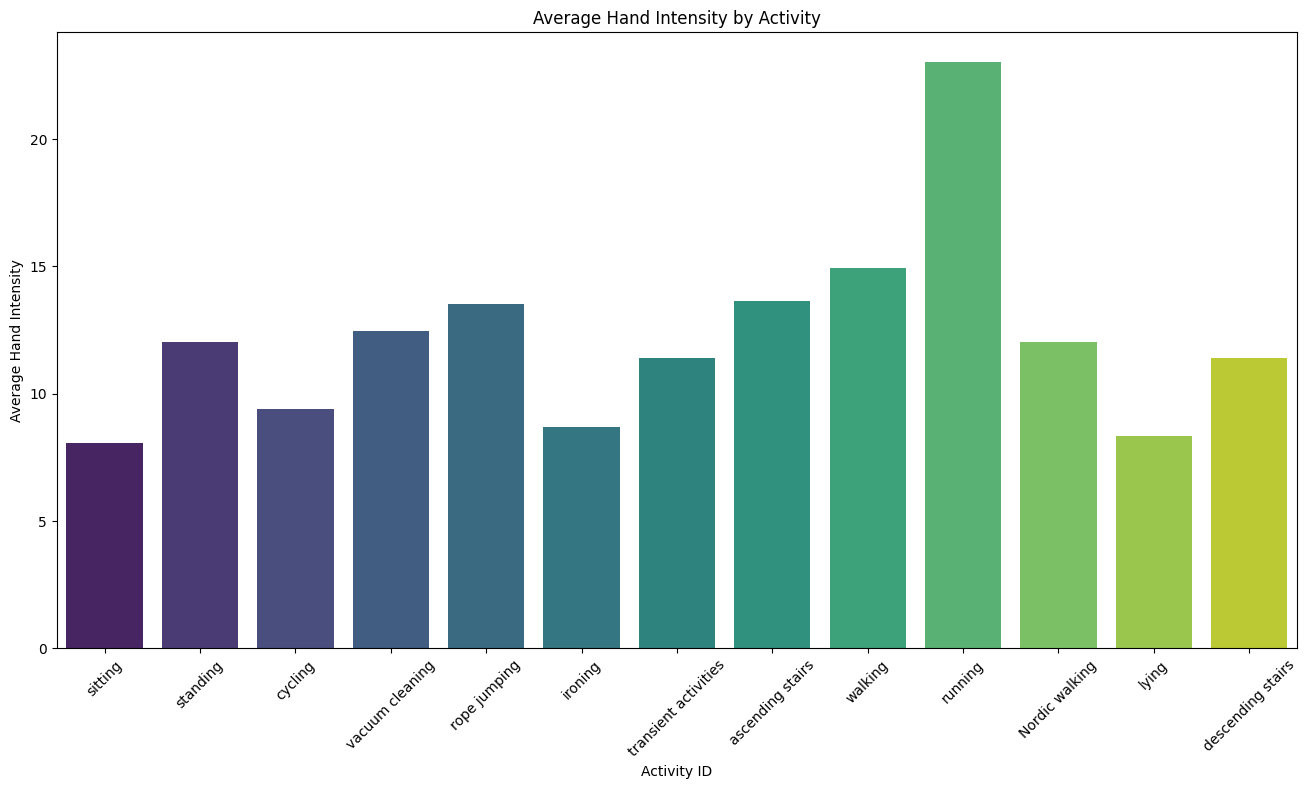

In [11]:
# Convert Spark DataFrame to Pandas DataFrame
pandas_df = avg.toPandas()

# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(16, 8))

# Create a barplot for avg(hand_intensity)
sns.barplot(x='activityID', y='avg(hand_intensity)', data=pandas_df, palette="viridis")
plt.title('Average Hand Intensity by Activity')
plt.xticks(rotation=45)
plt.xlabel('Activity ID')
plt.ylabel('Average Hand Intensity')
plt.show()


In [25]:
spark.stop()